# Uso do groupby

Códigos apresentados no vídeo [*Groupby* no *python*: exemplos com dados de seguro rural](https://youtu.be/UOE6pE8zxvU)

Passos necessários para trabalhar com dados:

**Passo 1**: Entendimento dos dados
- visão geral dos dados (*shape*, *head*, *tail*, *sample*, *dtypes*)
- resumo estatístico: *describe*

**Passo 2**: Limpeza e organização dos dados
- Apagar colunas e linhas desnecessárias (*drop*)
- Identificar colunas duplicadas
- Corrigir valores, nomes etc.
- Renomear colunas
- Criar novas colunas

**Passo 3**: Gráficos para entender as variáveis

- Variáveis quantitativas: histogramas, KDE, *boxplots*
- Variáveis qualitativas: gráficos de colunas, de barras, linhas, pizza

**Passo 4**: Relação entre variáveis

- Diagramas de dispersão
- Mapas de calor (*heatmaps*)
- Agrupamento dos dados: *groupby*  ◀

**Passo 5**: Elaborar uma questão sobre os dados    ◀   

Tentar responder uma questão sobre os dados usando um gráfico ou estatística.


Importar pacotes necessários:

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)             # permite a visualização de 50 colunas do dataframe
pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

# parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Criação dos dados - ATENÇÃO!

NÃO É necessário executar os códigos da célula abaixo se os dados de 2021 (ou outro ano) já estão salvos. Pule para a leitura dos dados.

A célula abaixo realiza todos os passos necessários para carregar os dados de seguro rural de 2016 a 2021, limpar, organizar, separar os dados de 2021 e salvar a planilha.

Tarefa feita no notebook de limpeza e organização: https://colab.research.google.com/drive/1YG5gjUd_U4DTcCLT1nWnvxXCBRylLn0G?authuser=1

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
# tire o comentário se quiser executar
# dados = pd.read_excel("psrdadosabertos2016a2021excel.xlsx", decimal=',')

# seleção de dados
dados21 = dados[dados['ANO_APOLICE'] == 2021]
seg = dados21.copy()
seg = seg.reset_index(drop=True)
# limpeza e organização
seg = seg.fillna(0)
df = seg.replace(['-', '...', 'X'], 0)
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
# criação de nova coluna
df['DT_FIM_VIGENCIA'] = pd.to_datetime(df['DT_FIM_VIGENCIA'], errors = 'coerce')
df['duracao'] = (df['DT_FIM_VIGENCIA'] - df['DT_INICIO_VIGENCIA']).dt.days
df.dropna(inplace=True)
# apagar colunas sem interesse
retirar = ['CD_PROCESSO_SUSEP', 'NR_PROPOSTA', 'ID_PROPOSTA',
       'DT_PROPOSTA', 'DT_INICIO_VIGENCIA', 'DT_FIM_VIGENCIA', 'NM_SEGURADO',
       'NR_DOCUMENTO_SEGURADO','LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT',
       'NR_SEG_LAT', 'LONGITUDE', 'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG',
       'NR_DECIMAL_LATITUDE', 'NR_DECIMAL_LONGITUDE', 'DT_APOLICE', 'ANO_APOLICE']
df = df.drop(retirar, axis=1)
# corrigir strings
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].str.split().str.join(' ')
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].replace([np.NaN], '0')
df['NM_RAZAO_SOCIAL'] = df['NM_RAZAO_SOCIAL'].str.strip()
df['NM_CULTURA_GLOBAL'] = df['NM_CULTURA_GLOBAL'].str.strip()
# mudar nomes de colunas
df.columns = ['seguradora', 'nome_mun', 'uf',
              'tipo', 'cultura', 'area', 'animal',
              'prod_est', 'prod_seg', 'nivel_cob',
              'total_seg', 'premio', 'taxa',
              'subvencao', 'apolice', 'mun', 'indenizacao',
              'evento', 'duracao']
df['mun'] = df['mun'].astype(int)
# criar outras colunas
df['sinistralidade'] = df['indenizacao'] / df['premio']
df['sinistro'] = np.where(df['evento'].str.isnumeric(), 0, 1)
# organizar colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg',
                'premio', 'taxa', 'subvencao', 'indenizacao',
                'evento', 'sinistro', 'sinistralidade']]

# salvar novos dados
# tire o comentário se quiser salvar
# df.to_excel("seguro-rural-2021.xlsx", index=False)

# Leitura dos dados

Lendo a partir do *google drive*.

In [2]:
# demora um pouco
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dados')
seg = pd.read_excel("seguro-rural-2021.xlsx")

Mounted at /content/drive


In [3]:
# fazer uma cópia do dataframe
df = seg.copy()

In [4]:
df.shape

(212838, 21)

In [5]:
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010026768,5218805,Rio Verde,GO,Newe Seguros S.A,CUSTEIO,Milho 2ª safra,62.00,0,181,6171.60,4011.60,0.65,133064.77,7895.27,0.06,3158.11,17583.39,SECA,1,2.23
1,494404,5211909,Jataí,GO,BRASILSEG COMPANHIA DE SEGUROS,CUSTEIO,Milho 2ª safra,268.00,0,365,6013.00,3908.45,0.65,608223.32,33452.28,0.05,13380.91,0.00,0,0,0.00
2,4525000065701,5107859,São Félix do Araguaia,MT,Mapfre Seguros Gerais S.A.,PRODUTIVIDADE,Milho 2ª safra,850.00,0,244,6276.00,4079.40,0.65,2311660.00,195224.61,0.08,48000.00,0.00,0,0,0.00
3,1000100040113,4107306,Doutor Camargo,PR,FairFax Brasil Seguros Corporativos S/A,PRODUTIVIDADE,Milho 2ª safra,15.73,0,278,5569.80,3620.40,0.65,47457.41,5277.26,0.11,2110.90,16413.80,SECA,1,3.11
4,1000111016260,4126009,São Sebastião da Amoreira,PR,Too Seguros S.A.,PRODUTIVIDADE,Milho 2ª safra,124.97,0,180,5226.00,3658.20,0.70,304776.84,43755.91,0.14,17502.36,248902.36,SECA,1,5.69


In [6]:
# apólices de um município
df.query("nome_mun == 'Varginha'")

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
647,3983001812501,3170701,Varginha,MG,Mapfre Seguros Gerais S.A.,CUSTEIO,Café,7.86,0,365,0.00,0.00,0.00,70625.87,1702.85,0.02,681.14,0.00,0,0,0.00
660,3983001812401,3170701,Varginha,MG,Mapfre Seguros Gerais S.A.,CUSTEIO,Café,2.61,0,365,0.00,0.00,0.00,23545.38,567.70,0.02,227.08,0.00,0,0,0.00
2943,6036000266601,3170701,Varginha,MG,Mapfre Seguros Gerais S.A.,CUSTEIO,Café,4.00,0,365,0.00,0.00,0.00,35712.00,4133.59,0.12,1653.44,46631.40,GRANIZO,1,11.28
3315,102592,3170701,Varginha,MG,Tokio Marine Seguradora S.A.,CUSTEIO,Café,7.44,0,365,0.00,0.00,0.00,189720.00,5918.00,0.03,2367.20,68365.00,GEADA,1,11.55
3806,102587,3170701,Varginha,MG,Tokio Marine Seguradora S.A.,CUSTEIO,Café,26.45,0,365,0.00,0.00,0.00,674475.00,21042.00,0.03,8416.80,275721.25,GRANIZO,1,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204337,190916,3170701,Varginha,MG,BRASILSEG COMPANHIA DE SEGUROS,CUSTEIO,Café,11.91,0,365,2698.00,1753.70,0.65,325000.00,11516.30,0.04,4606.52,0.00,SECA,1,0.00
206063,190284,3170701,Varginha,MG,BRASILSEG COMPANHIA DE SEGUROS,CUSTEIO,Café,37.86,0,365,2698.00,1753.70,0.65,11049999.81,39155.43,0.00,15662.17,0.00,0,0,0.00
207131,186175,3170701,Varginha,MG,BRASILSEG COMPANHIA DE SEGUROS,CUSTEIO,Café,21.20,0,365,2698.00,1753.70,0.65,599341.28,21237.52,0.04,8495.01,0.00,0,0,0.00
207461,103243,3170701,Varginha,MG,Tokio Marine Seguradora S.A.,CUSTEIO,Café,6.20,0,365,0.00,0.00,0.00,34875.00,1109.00,0.03,443.60,0.00,0,0,0.00


In [7]:
# simplificar os tipos de seguro da variável 'tipo'
df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'RECEITA': 'receita',
                    'PECUÁRIO': 'pecuário'}, inplace=True)

<ipython-input-7-5866cb1c5253>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo'].replace({'CUSTEIO': 'custeio',


In [8]:
# simplificar os nomes de eventos preponderantes da variável 'evento'
df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.',
                      'DOENÇAS E PRAGAS': 'doenças'}, inplace=True)

<ipython-input-8-5275a48e95e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['evento'].replace({'0':'nenhum',


In [9]:
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas',
                                            'Lima': 'frutas',
                                            'Graviola': 'frutas'})

In [10]:
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

In [11]:
df['uf'].unique()

array(['GO', 'MT', 'PR', 'MS', 'MG', 'SP', 'ES', 'TO', 'SC', 'DF', 'BA',
       'RS', 'MA', 'PI', 'PB', 'PA', 'RO', 'SE', 'CE', 'PE', 'AM', 'RJ',
       'AL', 'RR', 'RN', 'AC'], dtype=object)

# Uso do groupby

Como vamos agregar as informações por UF, é preciso garantir que não haverá um valor incorreto para essa variável.

In [12]:
# caso haja um valor incorreto de uma variável,
# podemos retirar as linhas correspondentes
# por exemplo, se tiver um valor de uf == 0, desconsiderar
df = df[df['uf'] != 0]

In [13]:
# agrupar as observações por estado ('uf') e obter as médias das outras variáveis
df.groupby('uf').mean(numeric_only=True)

,mun,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
uf,,,,,,,,,,,,,,
AC,200029.83,42.50,0.00,353.83,625.00,406.25,0.11,540105.42,19259.46,0.02,5439.63,0.00,0.00,0.00
AL,2458905.64,69.95,0.40,362.21,14969.61,9730.26,0.57,281255.94,10149.12,0.03,2720.49,563.30,0.05,0.07
AM,534386.13,159.79,0.15,365.00,3602.82,2465.70,0.59,553567.31,38633.55,0.07,8576.80,169.87,0.03,0.02
BA,2003518.61,140.97,2.73,351.42,3190.33,2160.07,0.57,685087.54,44121.33,0.06,9405.13,9407.35,0.10,0.44
CE,1923116.33,27.85,0.33,419.83,0.00,0.00,0.00,149252.90,2563.49,0.02,1025.39,0.00,0.00,0.00
DF,5300108.00,128.21,0.00,332.48,4230.16,2881.69,0.69,504812.74,29249.90,0.06,7636.68,1285.56,0.05,0.03
ES,3113314.53,9.50,0.09,359.67,5110.05,4091.11,0.62,186289.52,6810.43,0.04,2676.25,699.44,0.03,0.10
GO,5161837.25,138.84,1.95,333.54,4506.72,3139.51,0.65,713639.39,29748.98,0.05,7484.82,12420.34,0.14,0.46
MA,1961574.62,219.57,7.63,359.21,3021.07,2000.34,0.58,1053228.49,82645.03,0.09,14900.76,5682.56,0.05,0.09


In [14]:
# agrupando por estado e ordenando pela subvenção em ordem decrescente
df.groupby('uf').mean(numeric_only=True).sort_values(by='premio', ascending=False)

,mun,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
uf,,,,,,,,,,,,,,
PI,2115342.05,241.51,0.68,356.26,3986.03,2638.06,0.63,1077592.24,106662.38,0.11,18803.05,18907.62,0.07,0.18
MA,1961574.62,219.57,7.63,359.21,3021.07,2000.34,0.58,1053228.49,82645.03,0.09,14900.76,5682.56,0.05,0.09
TO,1606520.27,173.12,6.47,331.96,2891.47,1911.84,0.55,843631.88,59831.92,0.08,12662.89,18684.25,0.13,0.25
MT,4905821.25,271.11,7.06,333.86,4103.72,2859.90,0.65,1220965.62,52345.25,0.05,12500.15,26860.27,0.19,0.45
BA,2003518.61,140.97,2.73,351.42,3190.33,2160.07,0.57,685087.54,44121.33,0.06,9405.13,9407.35,0.10,0.44
PA,1030818.16,162.28,9.05,358.25,2384.30,1644.68,0.42,993258.01,40399.85,0.05,9565.74,4958.24,0.06,0.16
AM,534386.13,159.79,0.15,365.00,3602.82,2465.70,0.59,553567.31,38633.55,0.07,8576.80,169.87,0.03,0.02
MS,4955226.12,133.34,0.56,298.82,4001.75,2719.22,0.66,542420.49,38373.44,0.08,9749.29,123202.67,0.65,3.16
RO,867428.38,184.41,5.76,364.48,3518.09,2474.45,0.58,755241.56,33056.50,0.04,7948.85,163.15,0.07,0.01


In [15]:
# agrupar por cultura e mostrar soma, média e frequência de prêmio e subvenção
(df.groupby(['cultura'])[['premio','subvencao']]
     .agg([('média','mean'),('freq','count'),('soma','sum')])
     .reset_index())

cultura   premio                     subvencao                   
                 média   freq         soma     média   freq        soma
0     Abacate 11763.79      7     82346.55   4705.52      7    32938.61
1     Abacaxi  3376.92     13     43900.00   1350.77     13    17560.00
2   Abobrinha  1675.33     11     18428.61    670.13     11     7371.44
3     Abóbora  3468.25     29    100579.39   1387.30     29    40231.75
4      Alface  1554.83     11     17103.08    621.93     11     6841.18
..        ...      ...    ...          ...       ...    ...         ...
59     Tomate 13242.48   2619  34682048.67   5282.44   2619 13834721.41
60      Trigo 17908.80  14790 264871171.62   6702.36  14790 99127871.32
61  Triticale 10214.19     76    776278.79   3717.87     76   282558.30
62        Uva  8029.24   9156  73515677.91   3249.66   9156 29753853.50
63      Vagem   886.02     11      9746.25    354.41     11     3898.49

[64 rows x 7 columns]

In [16]:
# agrupar por tipo de cultura e mostrar média, frequência e soma
# de prêmio, subvenção e indenizações
(df.groupby(['tipo_cultura'])[['premio', 'subvencao', 'indenizacao']]
     .agg([('média','mean'),('freq','count'),('soma','sum')])
     .reset_index())

tipo_cultura   premio                       subvencao                       \
                  média    freq          soma     média    freq         soma   
0       frutas 13833.81   12912  178622091.25   5492.12   12912  70914207.81   
1        grãos 21287.78  171656 3654174321.92   5667.23  171656 972813207.29   
2   hortaliças 13804.05    4900   67639840.75   5440.88    4900  26660298.52   
3  leguminosas 20242.43    2450   49593961.94   5265.46    2450  12900388.59   
4       outros 16514.02     307    5069803.74   5776.11     307   1773266.97   
5      perenes  8294.87   19697  163384044.95   3247.42   19697  63964368.39   
6     sementes 10848.09     916    9936850.83   4081.96     916   3739075.03   

  indenizacao                        
        média    freq          soma  
0    10750.95   12912  138816237.56  
1    54364.41  171656 9331976652.91  
2    10586.20    4900   51872382.08  
3    31574.99    2450   77358723.78  
4     6485.42     307    1991023.12  
5     8872.80   19697  174767612.67  
6     5196.62     916    4760103.16

In [17]:
df_g = df.groupby(['tipo_cultura'])[['premio','subvencao','indenizacao']].mean()
df_g

,premio,subvencao,indenizacao
tipo_cultura,,,
frutas,13833.81,5492.12,10750.95
grãos,21287.78,5667.23,54364.41
hortaliças,13804.05,5440.88,10586.20
leguminosas,20242.43,5265.46,31574.99
outros,16514.02,5776.11,6485.42
perenes,8294.87,3247.42,8872.80
sementes,10848.09,4081.96,5196.62


In [18]:
df_c = df.groupby(['cultura'])[['premio','subvencao','indenizacao']].mean()
df_c

,premio,subvencao,indenizacao
cultura,,,
Abacate,11763.79,4705.52,19884.07
Abacaxi,3376.92,1350.77,0.00
Abobrinha,1675.33,670.13,0.00
Abóbora,3468.25,1387.30,2740.62
Alface,1554.83,621.93,0.00
...,...,...,...
Tomate,13242.48,5282.44,14689.64
Trigo,17908.80,6702.36,8934.62
Triticale,10214.19,3717.87,4225.28


# Elaborar questões sobre os dados


1. Ordenar os valores de prêmio médio por estado.

In [19]:
df.groupby('uf')['premio'] \
    .agg(['mean','count']) \
    .sort_values('mean', ascending=False)['mean']

,mean
uf,
PI,106662.38
MA,82645.03
TO,59831.92
MT,52345.25
BA,44121.33
PA,40399.85
AM,38633.55
MS,38373.44
RO,33056.50


In [20]:
# criar um dataframe com as médias das variáveis por estado
df_uf = df.groupby(by=['uf']).mean(numeric_only=True)
df_uf = df_uf.reset_index()
df_uf.head()

,uf,mun,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
0,AC,200029.83,42.50,0.00,353.83,625.00,406.25,0.11,540105.42,19259.46,0.02,5439.63,0.00,0.00,0.00
1,AL,2458905.64,69.95,0.40,362.21,14969.61,9730.26,0.57,281255.94,10149.12,0.03,2720.49,563.30,0.05,0.07
2,AM,534386.13,159.79,0.15,365.00,3602.82,2465.70,0.59,553567.31,38633.55,0.07,8576.80,169.87,0.03,0.02
3,BA,2003518.61,140.97,2.73,351.42,3190.33,2160.07,0.57,685087.54,44121.33,0.06,9405.13,9407.35,0.10,0.44
4,CE,1923116.33,27.85,0.33,419.83,0.00,0.00,0.00,149252.90,2563.49,0.02,1025.39,0.00,0.00,0.00


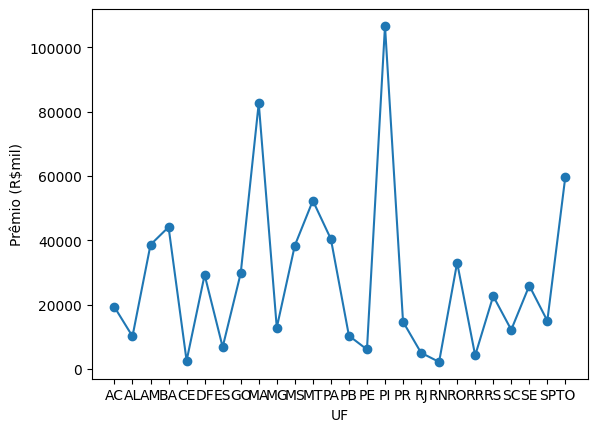

In [21]:
# gráfico do prêmio médio por estado
plt.plot(df_uf['uf'], df_uf['premio'], marker='o')
plt.title('')
plt.xlabel('UF')
plt.ylabel('Prêmio (R$mil)');

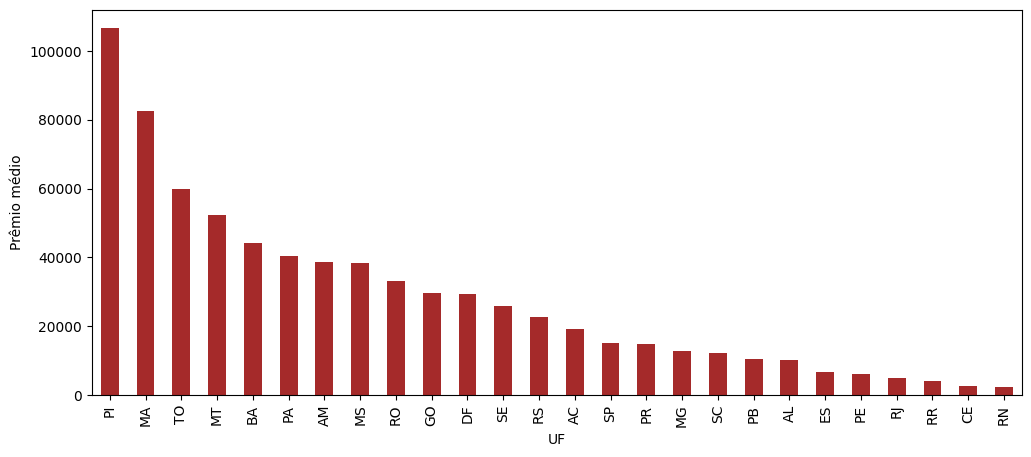

In [22]:
# gráfico de colunas - média de prêmio por estado em ordem decrescente
ax = df.groupby('uf')['premio'] \
    .agg(['mean','count']) \
    .sort_values('mean', ascending=False)['mean'] \
    .plot(kind='bar', figsize=(12,5), title='', color='brown')
ax.set_xlabel('UF')
ax.set_ylabel('Prêmio médio')
plt.show()

Responda: a) Quais são os cinco estados com maiores prêmios médios (do maior para o menor)?

R.:

2. Comparar os valores médios de prêmio e indenização por estado.

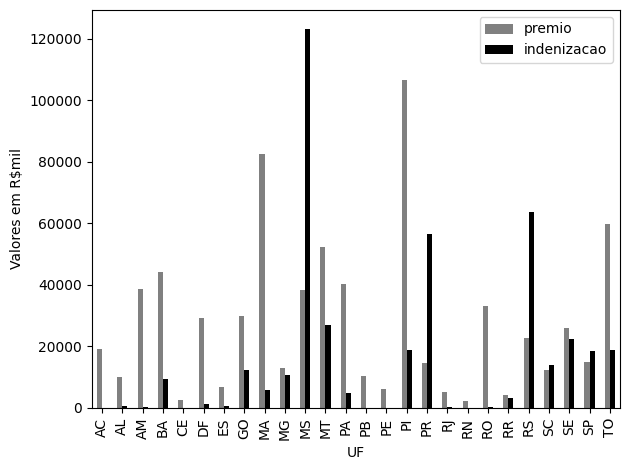

In [23]:
df_uf = df.groupby(by=['uf']).mean(numeric_only=True)
df_uf[['premio','indenizacao']].plot.bar(color = ['grey','black'])
plt.xlabel('UF')
plt.ylabel('Valores em R$mil')
plt.tight_layout()
plt.show()

Responda: b) Para quais estados os valores médios de indenizações ultrapassaram os valores médios de prêmios?

R.:

3. Qual a cultura mais segurada em cada estado?

In [24]:
# usando for
for i in df['uf'].unique():
  print(i, df[df['uf'] == i]['cultura'].value_counts().index[0])

GO Soja
MT Soja
PR Soja
MS Soja
MG Café
SP Soja
ES Café
TO Soja
SC Soja
DF Soja
BA Soja
RS Soja
MA Soja
PI Soja
PB Cana-de-açúcar
PA Soja
RO Soja
SE Milho 1ª safra
CE Pecuário
PE Cana-de-açúcar
AM Soja
RJ Pecuário
AL Cana-de-açúcar
RR Pecuário
RN Mandioca
AC Pecuário


In [25]:
# usando apply
df.groupby('uf')['cultura'].apply(lambda x: x.value_counts().index[0])

,cultura
uf,
AC,Pecuário
AL,Cana-de-açúcar
AM,Soja
BA,Soja
CE,Pecuário
DF,Soja
ES,Café
GO,Soja
MA,Soja


Responda: c) Para quais estados a soja é a principal cultura segurada?

R.:


d) Usando o comando: uf_cult.value_counts()

Responda: Qual foi a cultura mais segurada na maioria dos estados em 2023?

R.:

e) Eu mostrei em um dos exemplos como obter as médias de prêmio, subvenção e indenização por cultura. Execute:

In [26]:
# obter médias de prêmio, subvenção e indenização por cultura
df_c = df.groupby(['cultura'])[['premio','subvencao','indenizacao']].mean()
# criar um dataframe com médias de prêmio, subvenção e indenização por cultura
df_cult = pd.DataFrame(df_c).reset_index()
df_cult

,cultura,premio,subvencao,indenizacao
0,Abacate,11763.79,4705.52,19884.07
1,Abacaxi,3376.92,1350.77,0.00
2,Abobrinha,1675.33,670.13,0.00
3,Abóbora,3468.25,1387.30,2740.62
4,Alface,1554.83,621.93,0.00
...,...,...,...,...
59,Tomate,13242.48,5282.44,14689.64
60,Trigo,17908.80,6702.36,8934.62
61,Triticale,10214.19,3717.87,4225.28
62,Uva,8029.24,3249.66,2701.48


Para escolher algumas culturas para mostrar, você pode usar o comando query no dataframe df_cult. Por exemplo, eu quero saber as médias para abacaxi, uva e tomate (passo esses nomes em uma lista):

In [27]:
df_cult.query('cultura == ["Abacaxi", "Uva", "Tomate"]')

,cultura,premio,subvencao,indenizacao
1,Abacaxi,3376.92,1350.77,0.00
59,Tomate,13242.48,5282.44,14689.64
62,Uva,8029.24,3249.66,2701.48


Faça o mesmo para responder: Quais foram as médias de prêmio, subvenção e indenização para a cultura respondida na letra d? E quais foram as médias para a soja? Compare as duas culturas numa célula de texto abaixo dos comandos.

# Agregar as informações por município com o *groupby*

Vamos fazer uma cópia do *dataframe* original antes de fazer algumas alterações nos dados:

In [28]:
df1 = df.copy()

In [29]:
# agrupar as apólices pelo município
# escolher as funções que serão aplicadas às variáveis numéricas
# 'apolice': função count para contar o número de apólices no município
# sum vai somar os valores das variáveis para todas as apólices do município
# mean vai calcular a média dos valores das variáveis de todas as apólices do município
df1 = df1.groupby(['nome_mun', 'uf']).aggregate({'apolice': 'count',
                                                 'area': 'sum',
                                                 'animal': 'sum',
                                                 'prod_est': 'sum',
                                                 'prod_seg': 'sum',
                                                 'total_seg': 'sum',
                                                 'premio': 'sum',
                                                 'subvencao': 'sum',
                                                 'indenizacao': 'sum'})
df1 = df1.reset_index()         # para que os índices sejam as posições das linhas

In [30]:
df1.sample(5)

,nome_mun,uf,apolice,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao
1438,Garapuava,MG,13,779.25,0,49250.00,33965.00,3580750.01,131153.42,27263.43,9611.16
3743,Tereza Breda,PR,98,3636.60,0,408310.80,292023.00,14707260.07,1490834.33,510489.70,9329476.54
1151,Denise,MT,9,2187.46,0,85792.00,55764.80,11412972.77,171171.63,68468.65,0.00
2129,Mandaguari,PR,171,6167.29,0,682357.60,461064.48,25633131.47,1845824.54,575166.80,6056865.61
3083,Rio das Flores,RJ,1,0.00,1,0.00,0.00,100000.00,3889.77,1555.90,0.00


In [31]:
# pesquisando um município pelo seu nome
df1[df1['nome_mun'] == 'Varginha']

,nome_mun,uf,apolice,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao
3919,Varginha,MG,108,4858.74,0,45536.00,29924.40,59524571.13,1102597.77,440836.78,4162941.43
3920,Varginha,MT,2,410.00,0,9391.00,6273.70,1761470.58,93819.43,29308.76,156213.89


In [32]:
# pesquisando um município pelo seu nome e estado
df1[(df1['nome_mun'] == 'Varginha') & (df1['uf'] == 'MG')]

,nome_mun,uf,apolice,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao
3919,Varginha,MG,108,4858.74,0,45536.00,29924.40,59524571.13,1102597.77,440836.78,4162941.43


In [33]:
df1.shape

(4056, 11)

Como agregamos a informação por município, não temos mais a informação das variáveis categóricas como 'cultura'. Mas podemos incluir essas informações inserindo novas colunas com a cultura mais segurada de cada município, por exemplo.

In [34]:
# usando apply para obter a cultura mais segurada de cada município
cult = pd.DataFrame(df.groupby(['nome_mun', 'uf'])['cultura'].apply(lambda x: x.value_counts().index[0]))
cult = cult.reset_index()
df2 = df1.merge(cult)    # mesclar os dois dataframes: cult e df1
df2.sample(5)

,nome_mun,uf,apolice,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,cultura
2525,Onda Verde,SP,9,808.68,0,163417.85,112882.40,4641256.05,181526.67,43203.64,0.00,Cana-de-açúcar
2035,Lavandeira,TO,2,0.00,0,0.00,0.00,514808.14,7051.93,2820.77,0.00,Pecuário
3858,Ubirajara,SP,25,1002.18,0,67612.00,43937.50,4858456.13,286857.36,59633.09,28676.93,Soja
559,Breu Branco,PA,3,130.00,2,3055.00,2138.50,1234213.02,36345.40,8674.25,0.00,Pecuário
3547,São João,PR,226,9637.20,0,817440.34,569818.38,40576074.73,3281249.74,1140401.78,16562906.83,Soja


In [35]:
df2[df2['nome_mun'] == 'Varginha']

,nome_mun,uf,apolice,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,cultura
3919,Varginha,MG,108,4858.74,0,45536.00,29924.40,59524571.13,1102597.77,440836.78,4162941.43,Café
3920,Varginha,MT,2,410.00,0,9391.00,6273.70,1761470.58,93819.43,29308.76,156213.89,Soja


In [36]:
df2.shape

(4056, 12)

Vamos salvar a nova planilha que contém informações agregadas por município:

In [37]:
# salvar o dataframe como xlsx
df2.to_excel("seguro-rural-municipios-2021.xlsx", index=False)